In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
with open('/Users/jyang872/Desktop/new_algorithm_example/process-3s-crappy.json', 'r') as f:
    crappy_data = json.load(f)
with open('/Users/jyang872/Desktop/new_algorithm_example/process-3s-fuzzy.json', 'r') as f:
    fuzzy_data = json.load(f)
fuzzy_lbd_cals=fuzzy_data["outsideAlgo"]["LBD_calculation_records"]
crappy_lbd_cals=crappy_data["outsideAlgo"]["LBD_calculation_records"]


In [2]:
crappy_data["outsideAlgo"].keys()

dict_keys(['LBD_calculation_records', 'first_stage_IX_record', 'LBD_values_records', 'LBD_calculation_time_records'])

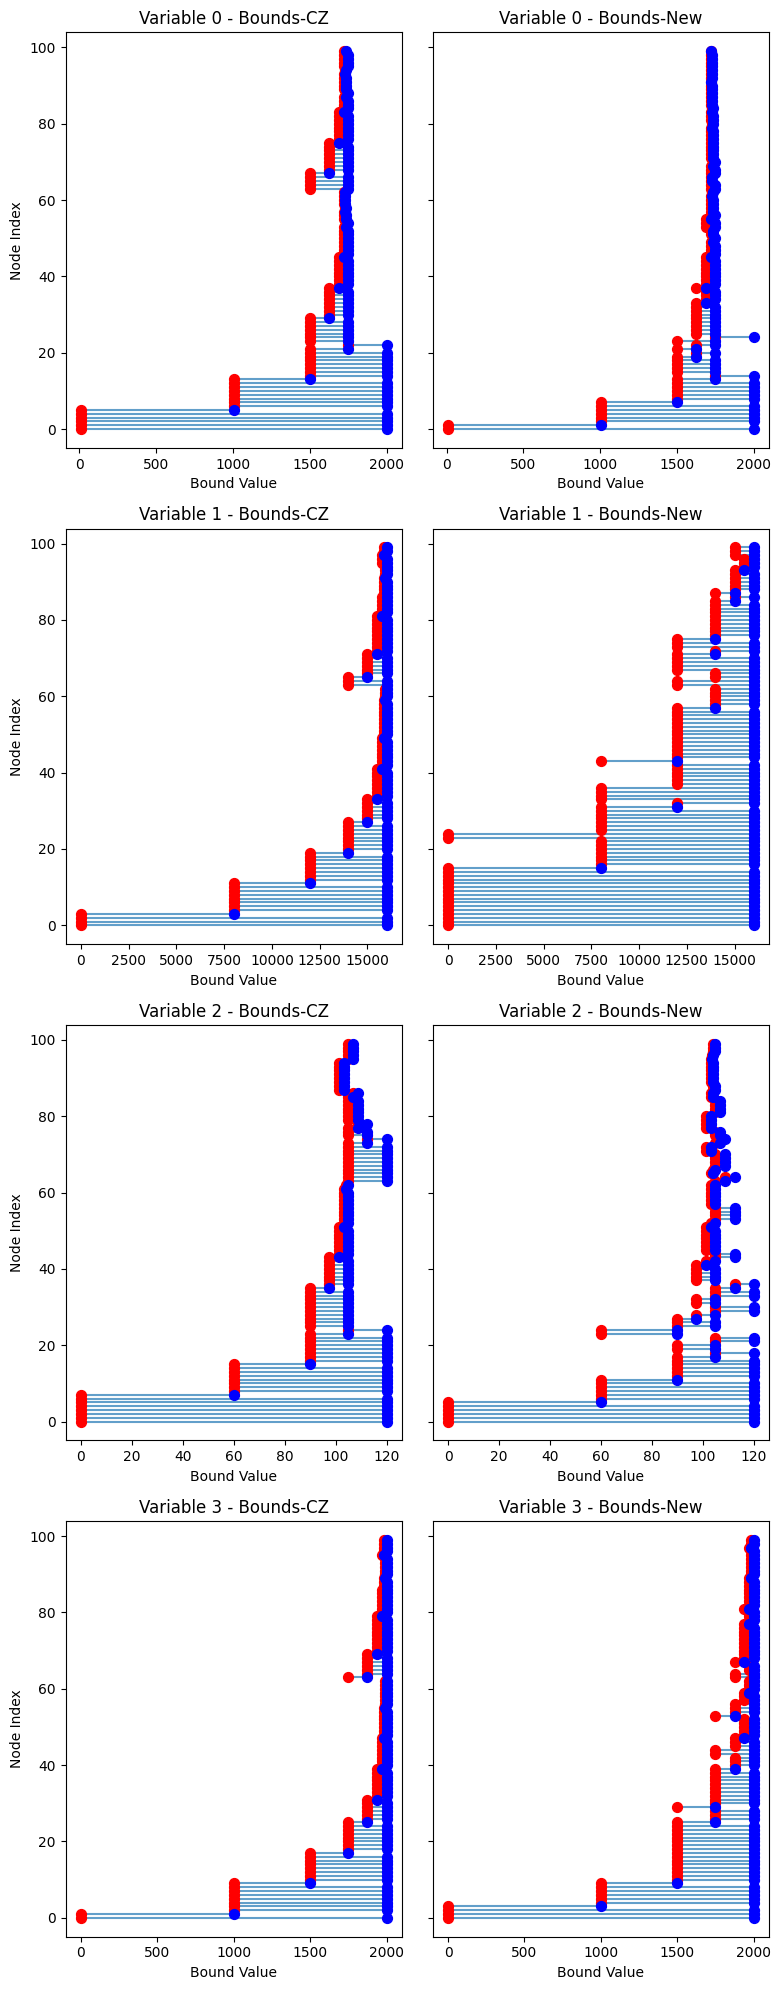

In [15]:
def plot_Bounds(crappy_data,fuzzy_data):

    fig, axes = plt.subplots(4, 2, figsize=(8, 20), sharey=True)

    for var_idx in range(4):
        lowers = [record[var_idx]['first'] for record in crappy_data]
        uppers = [record[var_idx]['second'] for record in crappy_data]
        y = range(len(lowers))
        axes[var_idx,0].hlines(y, lowers, uppers, alpha=0.7)
        axes[var_idx,0].scatter(lowers, y, color='red', s=50, zorder=5, label='Lower')
        axes[var_idx,0].scatter(uppers, y, color='blue', s=50, zorder=5, label='Upper')
        axes[var_idx,0].set_xlabel('Bound Value')
        axes[var_idx,0].set_title(f'Variable {var_idx} - Bounds-CZ')
        lowers = [record[var_idx]['first'] for record in fuzzy_data]
        uppers = [record[var_idx]['second'] for record in fuzzy_data]
        y = range(len(lowers))
        axes[var_idx,1].hlines(y, lowers, uppers, alpha=0.7)
        axes[var_idx,1].scatter(lowers, y, color='red', s=50, zorder=5, label='Lower')
        axes[var_idx,1].scatter(uppers, y, color='blue', s=50, zorder=5, label='Upper')
        axes[var_idx,1].set_xlabel('Bound Value')
        axes[var_idx,1].set_title(f'Variable {var_idx} - Bounds-New')
        axes[var_idx,0].set_ylabel('Node Index')

    plt.tight_layout()
    plt.show()
plot_Bounds(crappy_data["outsideAlgo"]["first_stage_IX_record"][:100], fuzzy_data["outsideAlgo"]["first_stage_IX_record"][:100])


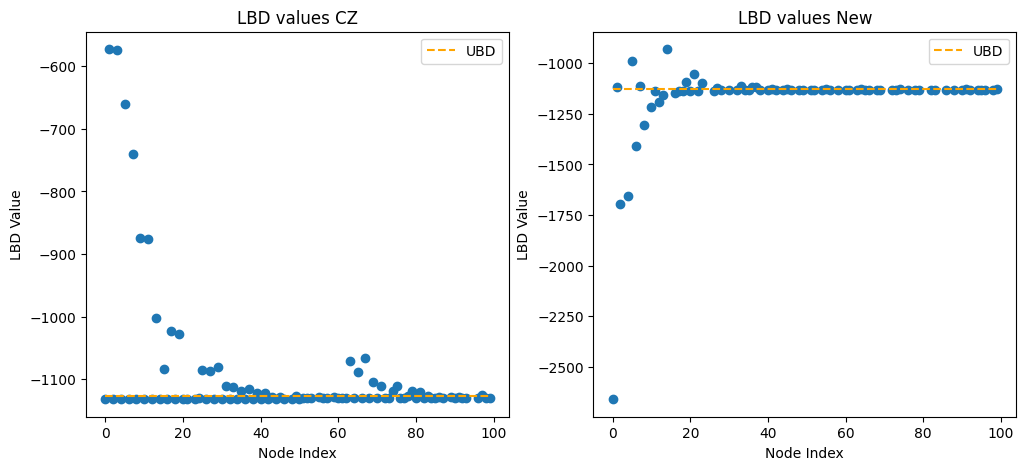

In [19]:
def plot_LBD_values(crappy_data,fuzzy_data,start,end):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(range(start,end), crappy_data["outsideAlgo"]["LBD_values_records"][start:end])
    plt.plot(range(start,end), -1126.42*np.ones(len(crappy_data["outsideAlgo"]["LBD_values_records"][start:end])),label="UBD",linestyle='dashed',c='orange')
    plt.xlabel('Node Index')
    plt.ylabel('LBD Value')
    plt.legend()
    plt.title('LBD values CZ')
    plt.subplot(1,2,2)
    plt.scatter(range(start,end), fuzzy_data["outsideAlgo"]["LBD_values_records"][start:end])
    plt.plot(range(start,end), -1126.42*np.ones(len(fuzzy_data["outsideAlgo"]["LBD_values_records"][start:end])),label="UBD",linestyle='dashed',c="orange")
    plt.xlabel('Node Index')
    plt.ylabel('LBD Value')
    plt.title('LBD values New')
    plt.legend()
plot_LBD_values(crappy_data,fuzzy_data,0,100)

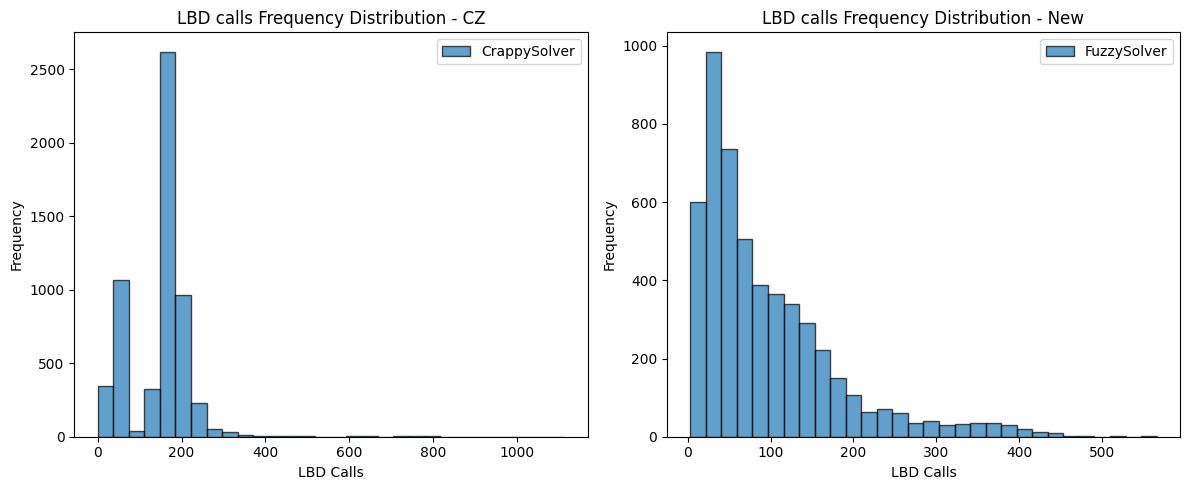

In [18]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.hist(fuzzy_lbd_cals[50:], bins=30, alpha=0.7, label='FuzzySolver', edgecolor='black')
plt.xlabel('LBD Calls')
plt.ylabel('Frequency')
plt.title('LBD calls Frequency Distribution - New')
plt.legend()

plt.subplot(1, 2, 1)
plt.hist(crappy_lbd_cals[50:], bins=30, alpha=0.7, label='CrappySolver', edgecolor='black')
plt.xlabel('LBD Calls')
plt.ylabel('Frequency')
plt.title('LBD calls Frequency Distribution - CZ')
plt.legend()

plt.tight_layout()
plt.show()

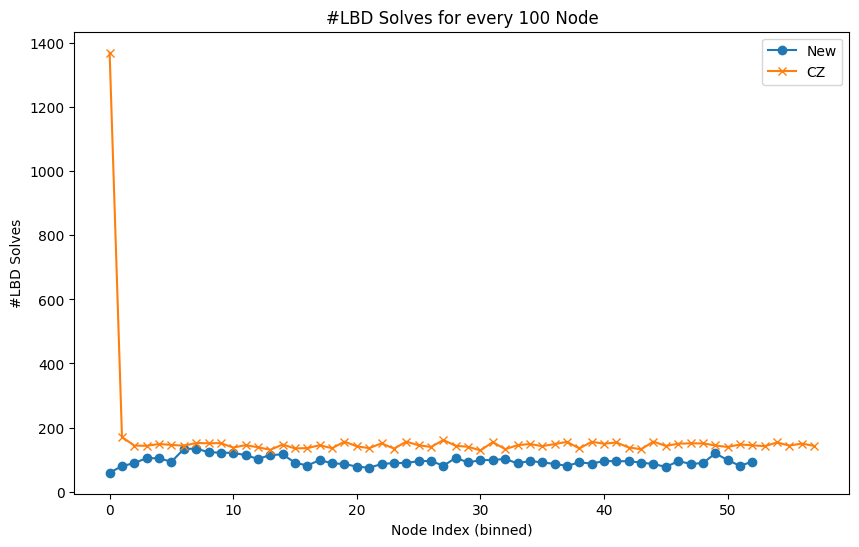

In [18]:
plt.figure(figsize=(10, 6))
lbd_cals=fuzzy_lbd_cals
# Calculate average for every 10 lbd_cals
bin_size = 100
avg_lbd = [sum(lbd_cals[i:i+bin_size])/len(lbd_cals[i:i+bin_size]) for i in range(0, len(lbd_cals), bin_size)]
bin_indices = [i//bin_size for i in range(0, len(lbd_cals), bin_size)]

plt.plot(bin_indices, avg_lbd, marker='o',label='New')
lbd_cals=crappy_lbd_cals
# Calculate average for every 10 lbd_cals
bin_size = 100
avg_lbd = [sum(lbd_cals[i:i+bin_size])/len(lbd_cals[i:i+bin_size]) for i in range(0, len(lbd_cals), bin_size)]
bin_indices = [i//bin_size for i in range(0, len(lbd_cals), bin_size)]
plt.plot(bin_indices, avg_lbd, marker='x',label='CZ')
plt.xlabel('Node Index (binned)')
plt.ylabel("#LBD Solves")
plt.title('#LBD Solves for every 100 Node')
plt.legend()